In [1]:
#importing libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
#loading data

fminst = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fminst.load_data()

4422102/4422102 [==============================] - 8s 2us/step


In [18]:
train_images = train_images/255
test_images = test_images/255

In [19]:
#creating model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [20]:
#compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
#running the model
hs = model.fit(train_images,train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2826 - accuracy: 0.8950 - val_loss: 0.3586 - val_accuracy: 0.8670
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2700 - accuracy: 0.8997 - val_loss: 0.3339 - val_accuracy: 0.8813
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2579 - accuracy: 0.9039 - val_loss: 0.3298 - val_accuracy: 0.8841
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2478 - accuracy: 0.9083 - val_loss: 0.3381 - val_accuracy: 0.8805
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2394 - accuracy: 0.9108 - val_loss: 0.3377 - val_accuracy: 0.8822
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2310 - accuracy: 0.9143 - val_loss: 0.3240 - val_accuracy: 0.8897
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2221 - accuracy: 0.9179 - val_loss: 0.3136 - val_

In [22]:
#plotting accuracy and validity
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epochs')

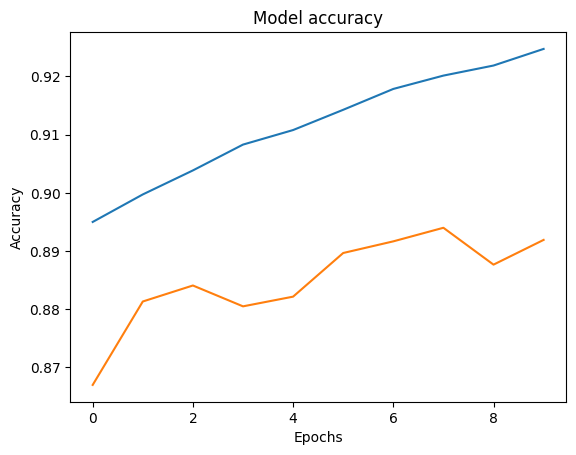

In [26]:
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epoch')

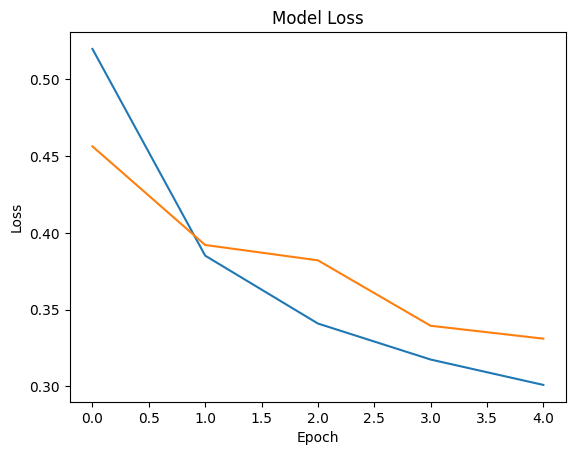

In [24]:
plt.plot(hs.history['loss'])
plt.plot(hs.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')